# Lecture 3

The **objective** of this lecture is to use correlations between variables to show systemic patterns in the data.  We can't ascribe causality, but we can use these tools as diagnostics.

In [127]:
import pandas
import matplotlib.pyplot as plt
from scipy import stats

### [Optional] Cleaning data directly from source

I will often post a cleaned dataset for class, rather than a raw or unruly dataset. Most data cleaning is just the practice of patience - which is beyond the scope of this class. I will do most of the cleaning behind the scenes. Today, however, I think it's worth seeing how to go from nothing - the direct download - to the dataset we use in class.  This is a quick and simple one, but it reveals some of the decisions made to ensure a clean dataset for class.  And some of those decisions are not innocuous.  

In [128]:
# Read the uncompressed dataset that has been downloaded from the EPA servers
# https://gaftp.epa.gov/EJSCREEN/2020/EJSCREEN_2020_USPR.csv.zip
df = pandas.read_csv(
    "EJSCREEN_2020_USPR.csv", 
    na_values='None', 
    dtype={'ID': str}
)

In [129]:
# A dictionary to translate opaque variable names to somthing that
# is human-readable
ejvars_dict = {
    'D_OZONE_2': 'Ozone Proximity index',
    'D_PM25_2':  'PM25 index',
    'OZONE': 'Raw ozone level in air',
    'PM25':  'Raw PM25 in air',
    'VULEOPCT': 'Demographic index',
    'ACSTOTPOP': 'Total population',
    'LOWINCPCT': '% low income',
    'MINORPCT': '% people of color',
    'ID': 'Census FIPS code for block group'
}

In [149]:
# Keep columns of interest, and drop any missing variables
df = df[list(ejvars_dict.keys())].dropna()

# Create the demographic index used for visualization
df["demographic_index"] = df.VULEOPCT - df.VULEOPCT.mean()

# Extract the FIPS code for each Census block
df['fips'] = df.ID.str[:5]
df['fips'] = df.fips.astype(int)

df.head()

,D_OZONE_2,D_PM25_2,OZONE,PM25,VULEOPCT,ACSTOTPOP,LOWINCPCT,MINORPCT,ID,demographic_index,fips
0,-1866.386370,-492.025529,36.760212,9.690899,0.274371,636,0.385220,0.163522,010010201001,-0.077268,1001
1,-7787.902602,-2053.083414,36.760212,9.690899,0.189588,1287,0.163170,0.216006,010010201002,-0.162051,1001
2,7002.783717,1846.126938,36.836966,9.711240,0.588895,810,0.501247,0.676543,010010202001,0.237256,1001
3,5280.461532,1392.075305,36.836966,9.711240,0.471891,1218,0.393701,0.550082,010010202002,0.120252,1001
4,-2911.892606,-769.374640,36.884999,9.745683,0.324309,2641,0.308217,0.340401,010010203001,-0.027330,1001


In [150]:
# Save the cleaned, smaller (37MB) dataset for class
df.to_csv("EJSCREEN_sample.csv", index=False)

The sample dataset is now available on disk to be quickly read into a dataframe.

### Correlations as diagnostics

Let's get a more detailed look at the data than the `describe()` method affords.

In [152]:
df = pandas.read_csv("EJSCREEN_sample.csv")
df.describe()

,D_OZONE_2,D_PM25_2,OZONE,PM25,VULEOPCT,ACSTOTPOP,LOWINCPCT,MINORPCT,ID,demographic_index,fips
count,216046.000000,216046.000000,216046.000000,216046.000000,216046.000000,216046.000000,216046.000000,216046.000000,2.160460e+05,2.160460e+05,216046.000000
mean,119.334165,141.804077,42.809740,8.471473,0.351639,1484.420809,0.334941,0.368337,2.823431e+11,6.446145e-17,28234.046842
std,16723.377651,3444.401415,6.582827,1.490363,0.226204,989.572104,0.211581,0.313300,1.569860e+11,2.262036e-01,15698.596138
min,-371198.063720,-90644.530105,24.953781,4.004773,0.000000,0.000000,0.000000,0.000000,1.001020e+10,-3.516392e-01,1001.000000
25%,-9157.996323,-1746.870154,39.409066,7.640961,0.170226,892.000000,0.164487,0.097070,1.311713e+11,-1.814132e-01,13117.000000
50%,-2796.255871,-538.105932,42.785367,8.514723,0.290369,1268.000000,0.303243,0.271214,2.810795e+11,-6.127004e-02,28107.000000
75%,7609.474718,1563.734759,45.509500,9.254419,0.507526,1818.000000,0.476502,0.603545,4.105100e+11,1.558864e-01,41051.000000
max,272045.350467,62799.333874,75.941846,16.459907,1.000000,55407.000000,1.000000,1.000000,5.604595e+11,6.483608e-01,56045.000000


1484


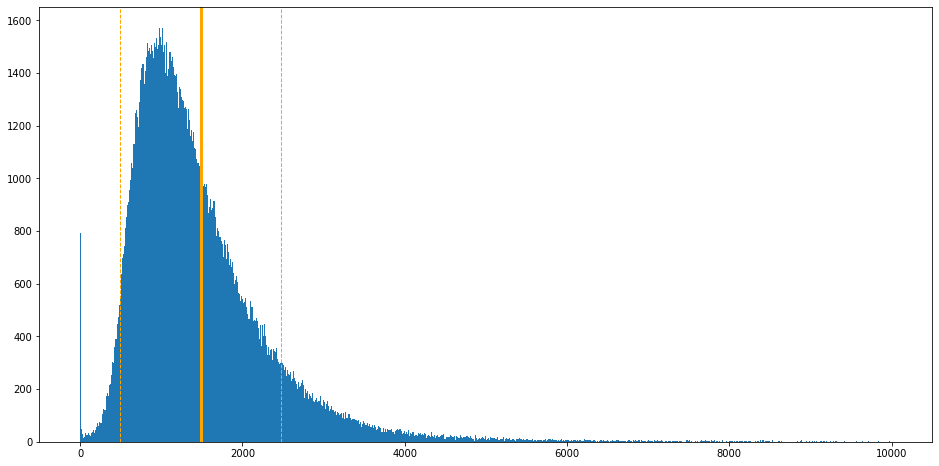

In [162]:
# Evolution of parameters fed into the plot
#     plt.hist(df.ACSTOTPOP)
#     plt.hist(df.ACSTOTPOP, range=[0,10000])

# Set figure size
plt.figure(figsize=(16, 8))

# Assign the plot to a variable, just to suppress output in Notebooks
fig = plt.hist(df["ACSTOTPOP"], range=[0,10000], bins=1000)

# Add a vertical line at the mean value, and standard deviations
plt.axvline(
    df.ACSTOTPOP.mean(), 
    linewidth=3, 
    color="orange"
)

plt.axvline(
    df.ACSTOTPOP.mean()-df.ACSTOTPOP.std(), 
    linewidth=1, 
    color="orange",
    linestyle="dashed"
)

plt.axvline(
    df.ACSTOTPOP.mean()+df.ACSTOTPOP.std(), 
    linewidth=1, 
    color="orange",
    linestyle="dashed"
)

print(int(df.ACSTOTPOP.mean()))

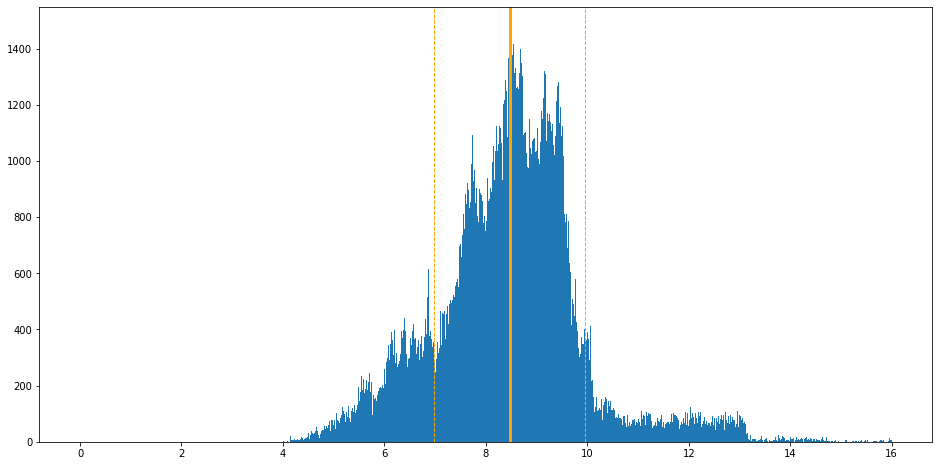

In [161]:
# Evolution of parameters fed into the plot
#     plt.hist(df.ACSTOTPOP)
#     plt.hist(df.ACSTOTPOP, range=[0,10000])

# Set figure size
plt.figure(figsize=(16, 8))

# Assign the plot to a variable, just to suppress output in Notebooks
fig = plt.hist(df.PM25, range=[0,16], bins=1000)

# Add a vertical line at the mean value, and standard deviations
plt.axvline(
    df.PM25.mean(), 
    linewidth=3, 
    color="orange"
)

plt.axvline(
    df.PM25.mean()-df.PM25.std(), 
    linewidth=1, 
    color="orange",
    linestyle="dashed"
)

plt.axvline(
    df.PM25.mean()+df.PM25.std(), 
    linewidth=1, 
    color="orange",
    linestyle="dashed"
)

The objective is to fit a line that is defined by $y=mx+b$ so that the coefficient $m$ and the intercept $b$ are chosen to minimize the errors between the line and the actual observations.  We use ordinary least squares to find the slope and intercept of this line - the linear model.  There may be other types of models that better represent the data than a linear model; but a linear model is a good first start, just to get a sense of the data.

Once we have found the $m$ and $b$ that minimize the errors, which we call $\hat{m}$ and $\hat{b}$, we get a predicted $y$ value for each $x$.  We denote and calculate this predicted $y$ value as $\hat{y} = \hat{m} x + \hat{b}$. Note that the $x$ value isn't estimated.  It's just the data.  And therefore has no hat on it.

For a particular record, with index $i$, calculate the predicted $y$ value for that observation as $\hat{y}_i = \hat{m} x_i + \hat{b}$.  Note that the values of $\hat{m}$ and $\hat{b}$ are constant across all observations and, as a result, don't need the $i$ index.

Finally, we denote $\bar{y}$ as the mean for the $y$ variable, across all observations.

In [132]:
m, b, _, _, _ = stats.linregress(df.PM25, df.D_PM25_2)
print(f"slope: {m}")
print(f"intercept: {b}")

slope: 620.0056991018266
intercept: -5110.557334718789


(-20000.0, 20000.0)

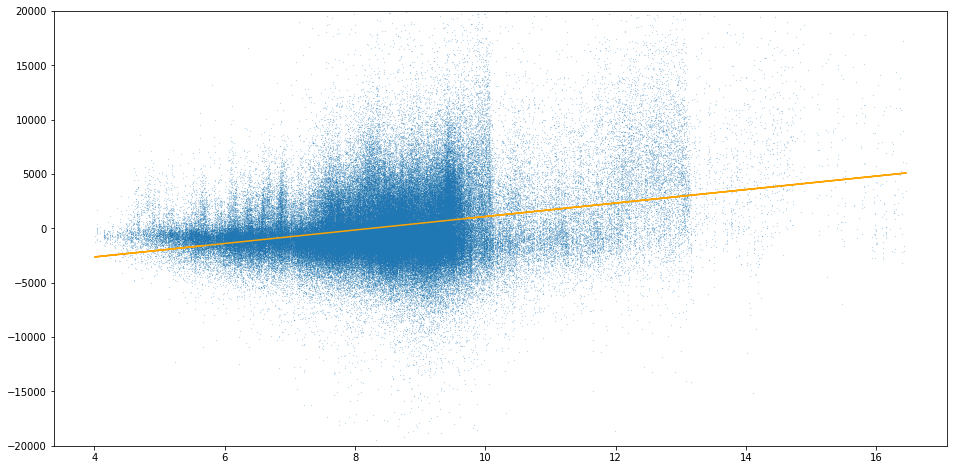

In [133]:
plt.figure(figsize=(16, 8))
plt.scatter(
    df.PM25,
    df.D_PM25_2,
    s=0.01
)

plt.plot(df.PM25, m*df.PM25 + b, color="orange")
plt.ylim([-20000, 20000])

In [134]:
m, b, _, _, _ = stats.linregress(df.demographic_index, df.D_PM25_2)
print(f"slope: {m}")
print(f"intercept: {b}")

slope: 12503.341791122128
intercept: 141.8040772768267


(-20000.0, 20000.0)

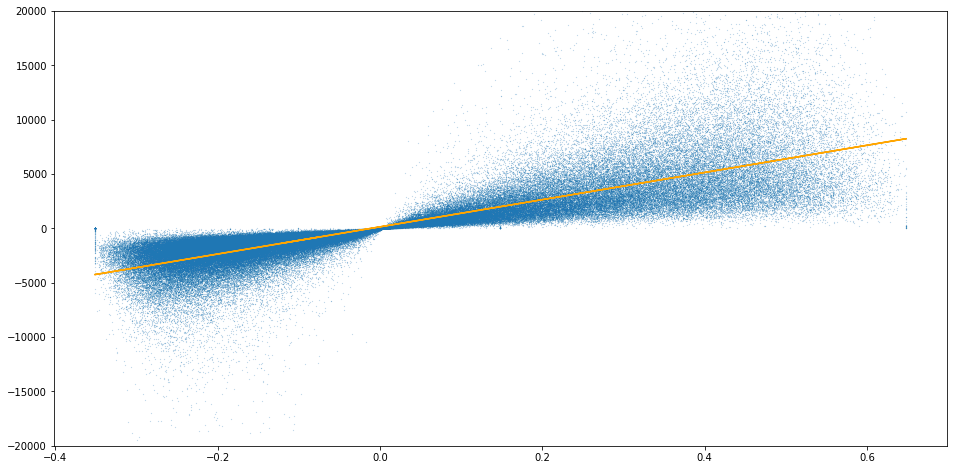

In [135]:
plt.figure(figsize=(16, 8))
plt.scatter(
    df.demographic_index,
    df.D_PM25_2,
    s=0.01
)
plt.plot(df.demographic_index, m*df.demographic_index + b, color="orange")
plt.ylim([-20000, 20000])

The R-squared, or coefficient of correlation, or coefficient of determination is a measure of how much of the variation can be explained by the linear model.  A higher $R^2$ value indicates that the linear model explains more of the variation - there is less variation relegated to the residuals, relative to the total variation.

$$ R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum_{i} (y_i - \hat{y}_{i})^{2}}{\sum_{i} (y_i - \bar{y})^{2}}$$



In [136]:
m, b, _, _, _ = stats.linregress(df.PM25, df.D_PM25_2)
df["yhat"] = m*df.PM25 + b
rss = np.sum((df.D_PM25_2 - df.yhat)**2)
tss = np.sum((df.D_PM25_2 - df.D_PM25_2.mean())**2)

1 - rss/tss

0.07196943600882877

In [137]:
m, b, r, _, _ = stats.linregress(df.PM25, df.D_PM25_2)

r**2

0.07196943600882912

In [138]:
m, b, _, _, _ = stats.linregress(df.demographic_index, df.D_PM25_2)
df["yhat"] = m*df.demographic_index + b
rss = np.sum((df.D_PM25_2 - df.yhat)**2)
tss = np.sum((df.D_PM25_2 - df.D_PM25_2.mean())**2)

1 - rss/tss

0.6742545686316725

In [139]:
m, b, r, _, _ = stats.linregress(df.demographic_index, df.D_PM25_2)

r**2

0.6742545686316732

In [140]:
# Source: https://www.cdc.gov/nchs/data_access/urban_rural.htm#Data_Files_and_Documentation
nchs = pandas.read_excel("NCHSURCodes2013.xlsx")
nchs = nchs[["FIPS code", "State Abr.", "County name", "2013 code"]]
nchs.columns = ["fips", "state", "county", "classification"]

In [141]:
# Associate each of the classifications to one of three categories, rather 
# than one of six - just to simplify our quick analysis
remap_dict = {
    1: "urban",
    2: "suburban",
    3: "suburban",
    4: "rural",
    5: "rural",
    6: "rural"
}

# replace the values of the `classification` column based on the key-value 
# pair in `remap_dict`
nchs = nchs.replace({'classification': remap_dict})

In [142]:
ejdf = df.merge(nchs, on="fips")

urban: 0.34177089535301153
suburban: 0.2981907610741884
rural: 0.38412821100569067


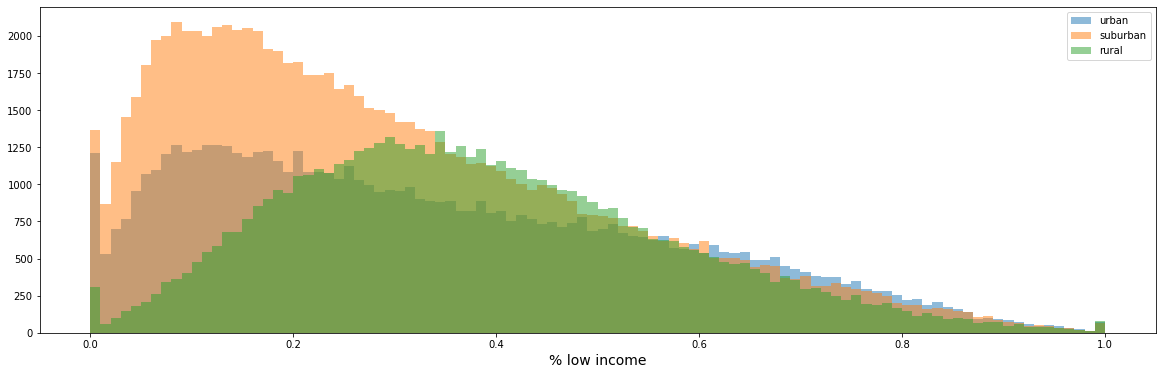

In [145]:
urban    = ejdf[ejdf.classification == "urban"].LOWINCPCT
suburban = ejdf[ejdf.classification == "suburban"].LOWINCPCT
rural    = ejdf[ejdf.classification == "rural"].LOWINCPCT

plt.figure(figsize=(20,6))
fig = plt.hist(urban, bins=100, alpha=0.5, label="urban")
fig = plt.hist(suburban, bins=100, alpha=0.5, label="suburban")
fig = plt.hist(rural, bins=100, alpha=0.5, label="rural")

plt.xlabel("% low income", size=14)
plt.legend(loc='upper right')

print(f"urban: {urban.mean()}")
print(f"suburban: {suburban.mean()}")
print(f"rural: {rural.mean()}")

urban: 0.5511409744033133
suburban: 0.33149629493118665
rural: 0.22044412001370967


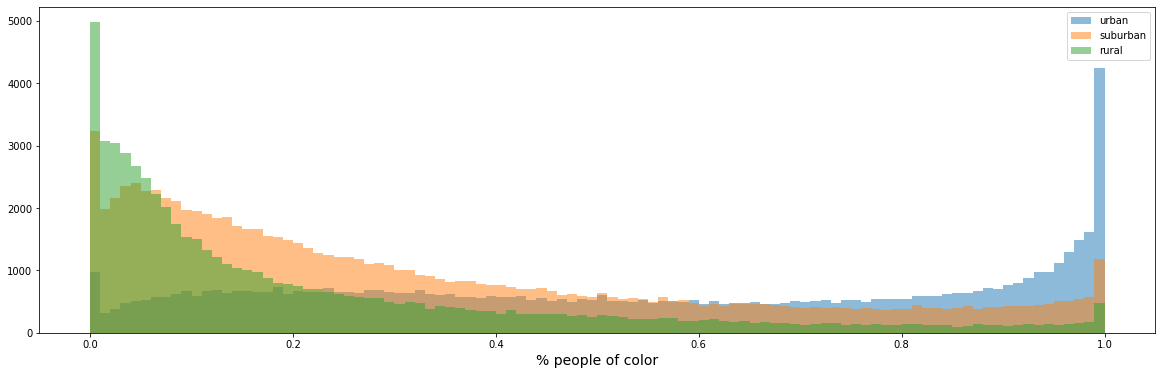

In [146]:
urban    = ejdf[ejdf.classification == "urban"].MINORPCT
suburban = ejdf[ejdf.classification == "suburban"].MINORPCT
rural    = ejdf[ejdf.classification == "rural"].MINORPCT

plt.figure(figsize=(20,6))
fig = plt.hist(urban, bins=100, alpha=0.5, label="urban")
fig = plt.hist(suburban, bins=100, alpha=0.5, label="suburban")
fig = plt.hist(rural, bins=100, alpha=0.5, label="rural")

plt.xlabel("% people of color", size=14)
plt.legend(loc='upper right')

print(f"urban: {urban.mean()}")
print(f"suburban: {suburban.mean()}")
print(f"rural: {rural.mean()}")